In [1]:
#IMPORTING ALL THE LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

# #                                       PROJECT NO=1 (PART 1)

# 1. Import and warehouse data:

In [2]:
# Importing all the given datasets and exploring shape and size of each
df1=pd.read_csv('Part1 - Normal.csv')

In [3]:
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
df1.shape

(100, 7)

In [5]:
df2=pd.read_csv('Part1 - Type_H.csv')
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [6]:
df2.shape

(60, 7)

In [7]:
df3=pd.read_csv('Part1 - Type_S.csv')
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [8]:
df3.shape

(150, 7)

In [9]:
#Merge all datasets onto one and explore final shape and size
df=pd.concat([df1,df2,df3],axis=0,ignore_index=True)

In [10]:
df.shape

(310, 7)

In [11]:
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


# 2. Data cleansing:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [13]:
#Exploring for null values in the attributes 
df.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [14]:
for value in ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree','Class']:
    print(value,":", sum(df[value] == '?'))

P_incidence : 0
P_tilt : 0
L_angle : 0
S_slope : 0
P_radius : 0
S_Degree : 0
Class : 0


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [16]:
# Correcting name of similer type of class (tp_s and Type_s) and (Nrmal,Normal) and (type_h,Type_H)
df.Class=df.Class.replace('tp_s','Type_S')
df.Class=df.Class.replace('Nrmal','Normal')
df.Class=df.Class.replace('type_h','Type_H')

In [17]:
df.Class.value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [18]:
#changing Datatype of Class variable
df['Class'] = df['Class'].astype('category')

In [19]:
#converting Text Class into 0,1,2
df.Class=df.Class.replace('Type_S',0)
df.Class=df.Class.replace('Normal',1)
df.Class=df.Class.replace('Type_H',2)

# 3. Data analysis & visualisation:

<AxesSubplot:xlabel='P_incidence', ylabel='Count'>

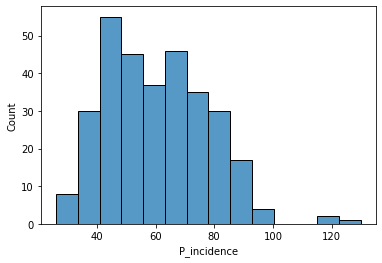

In [20]:
#univariate analysis
sns.histplot(df.P_incidence)

<AxesSubplot:xlabel='P_tilt', ylabel='Count'>

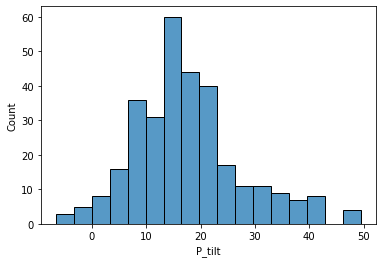

In [21]:
sns.histplot(df.P_tilt)

<AxesSubplot:xlabel='L_angle', ylabel='Count'>

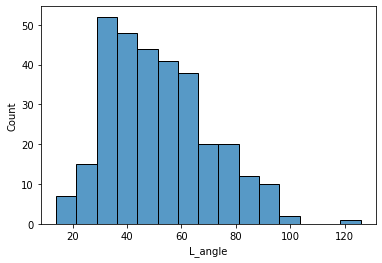

In [22]:
sns.histplot(df.L_angle)

<AxesSubplot:xlabel='S_slope', ylabel='Count'>

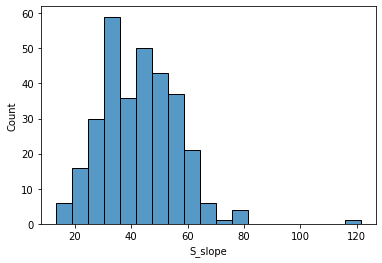

In [23]:
sns.histplot(df.S_slope)

<AxesSubplot:xlabel='P_radius', ylabel='Count'>

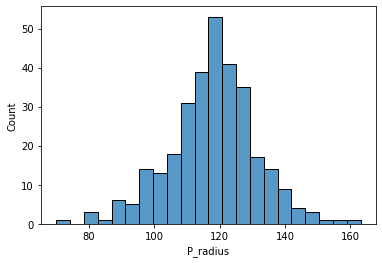

In [24]:
sns.histplot(df.P_radius)

<AxesSubplot:xlabel='S_Degree', ylabel='Count'>

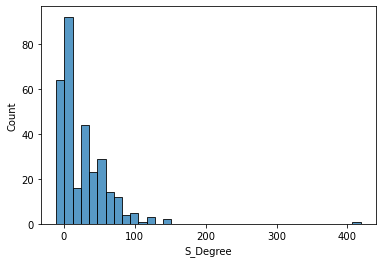

In [25]:
sns.histplot(df.S_Degree)

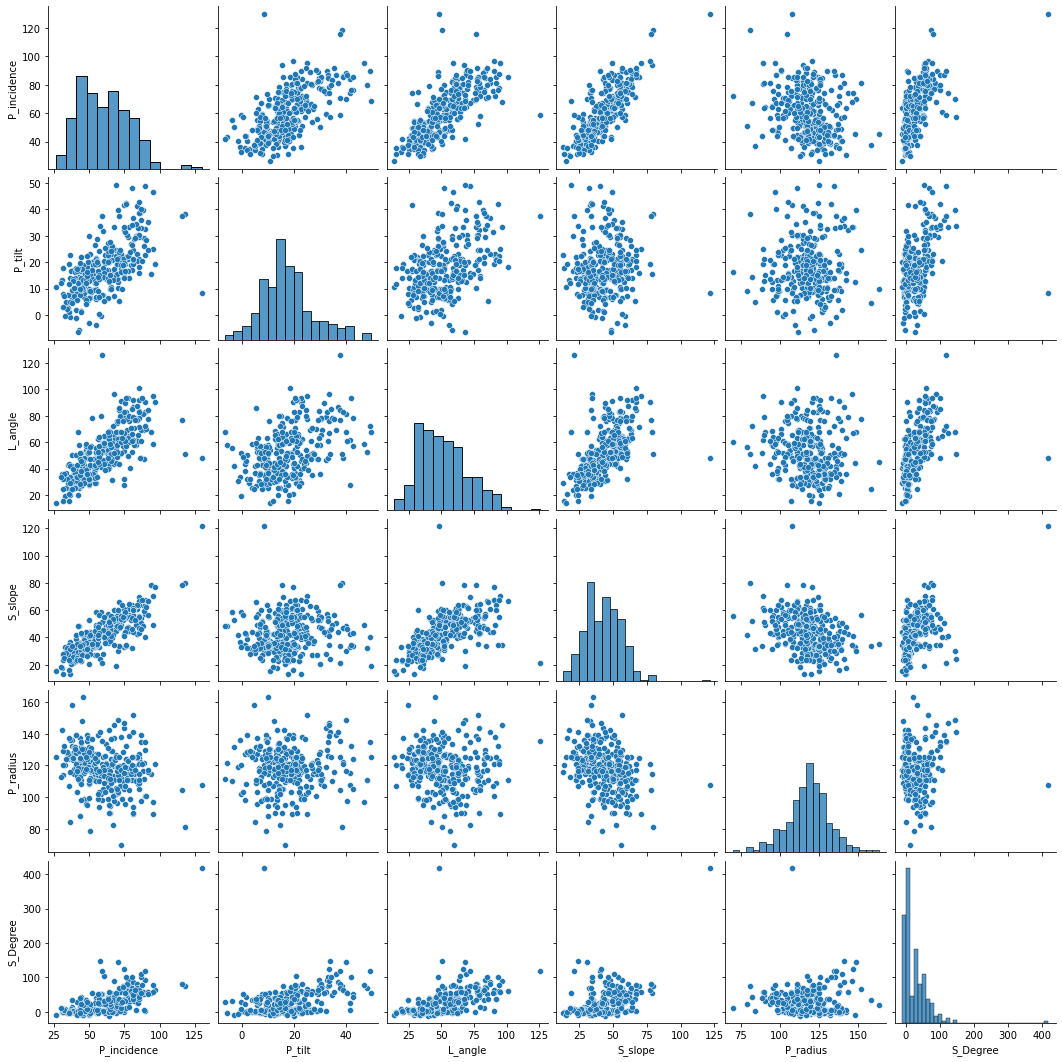

In [26]:
#MultiVariate Analysis
sns.pairplot(df)

In [27]:
#Checking Correlation between them
corrr=df.corr()

<AxesSubplot:>

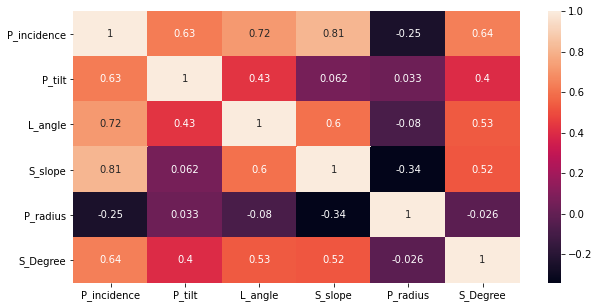

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(corrr,annot=True)

# 4. Data pre-processing:

In [29]:
#Segregate predictors vs target attributes
x=df.iloc[:,:-1]
y=df.Class

In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [31]:
#Scaling the data
X_std = pd.DataFrame(StandardScaler().fit_transform(x))
X_std.columns = x.columns

In [32]:
#Performing train-test split
X_train,X_test,Y_train,Y_test=train_test_split(X_std,y,test_size=.30,random_state=1)

In [33]:
print(X_train.shape)
print(Y_train.shape)

(217, 6)
(217,)


In [34]:
print(X_test.shape)
print(Y_test.shape)

(93, 6)
(93,)


# 5. Model training, testing 

In [35]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, Y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(Y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, Y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(Y_test, y_pred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, Y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(Y_test, y_pred))

0.7204301075268817
0.7419354838709677
0.7526881720430108


In [36]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [37]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


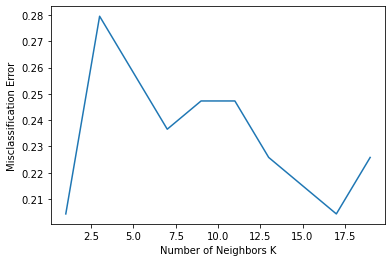

In [38]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# #Use k=1 as the final model for prediction

In [39]:

knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, Y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred, average=None))

0.7956989247311828
[0.89583333 0.71428571 0.64705882]


#  6. Conclusion and improvisation:

In [40]:
# The final model has a good accuracy as well as recall score compare to other model so thatswhy we will consider this model
# As we are seeing here that there are no strong relationship b/w Independent Variable that is good thing thatwhy we have taken all the data for training and testing.

#                                       PROJECT NO=2 (PART 2)

# 1. Import and warehouse data:

In [41]:
# Importing all the given datasets and exploring shape and size of each
dvv=pd.read_csv('Part2 - Data1.csv')
dvv

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2
...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3
4996,4997,30,4,15,92037,4,0.4,1
4997,4998,63,39,24,93023,2,0.3,3
4998,4999,65,40,49,90034,3,0.5,2


In [42]:
dvv.shape

(5000, 8)

In [43]:
dvf=pd.read_csv('Part2 -Data2.csv')
dvf

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...
4995,4996,0,0,0,1,0,0.0
4996,4997,85,0,0,1,0,0.0
4997,4998,0,0,0,0,0,0.0
4998,4999,0,0,0,1,0,0.0


In [44]:
dvf.shape

(5000, 7)

In [45]:
#Merging all datasets onto one and explore final shape and size
dp=pd.merge(dvv,dvf,on='ID')

In [46]:
dp

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [47]:
dp.shape

(5000, 14)

# 2. Data cleansing:

In [48]:
#checking null values
dp.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [49]:
#copy of dataset
dv=dp.copy()

In [50]:
#As we are seeing here that there are 20 null values in LoanOnCard Column , this Column has value 0 or 1 ,Also this column is so important for our orgnaztion 
#So thatswhy I'll have to drop these null value for better Analysis
dv=dv.dropna()

# 3. Data analysis & visualisation:

In [51]:
#Performing detailed statistical analysis on the data
dv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4980 non-null   int64  
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   ZipCode              4980 non-null   int64  
 5   HiddenScore          4980 non-null   int64  
 6   MonthlyAverageSpend  4980 non-null   float64
 7   Level                4980 non-null   int64  
 8   Mortgage             4980 non-null   int64  
 9   Security             4980 non-null   int64  
 10  FixedDepositAccount  4980 non-null   int64  
 11  InternetBanking      4980 non-null   int64  
 12  CreditCard           4980 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 583.6 KB


In [52]:
dv.LoanOnCard.value_counts(normalize=True)

0.0    0.903614
1.0    0.096386
Name: LoanOnCard, dtype: float64

In [53]:
dv.Level.value_counts()

1    2089
3    1496
2    1395
Name: Level, dtype: int64

In [54]:
dv.HiddenScore.value_counts()

1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64

In [55]:
for value in dv:
    print(value,":", sum(dv[value] == '?'))

ID : 0
Age : 0
CustomerSince : 0
HighestSpend : 0
ZipCode : 0
HiddenScore : 0
MonthlyAverageSpend : 0
Level : 0
Mortgage : 0
Security : 0
FixedDepositAccount : 0
InternetBanking : 0
CreditCard : 0
LoanOnCard : 0


In [56]:
#chaning data type for some features
dv['CreditCard'] = dv.CreditCard.astype('category')
dv['LoanOnCard']=dv.LoanOnCard.astype('category')
dv['InternetBanking']=dv.InternetBanking.astype('category')
dv['FixedDepositAccount']=dv.FixedDepositAccount.astype('category')
dv['Security']=dv.Security.astype('category')

In [57]:
dv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   4980 non-null   int64   
 1   Age                  4980 non-null   int64   
 2   CustomerSince        4980 non-null   int64   
 3   HighestSpend         4980 non-null   int64   
 4   ZipCode              4980 non-null   int64   
 5   HiddenScore          4980 non-null   int64   
 6   MonthlyAverageSpend  4980 non-null   float64 
 7   Level                4980 non-null   int64   
 8   Mortgage             4980 non-null   int64   
 9   Security             4980 non-null   category
 10  FixedDepositAccount  4980 non-null   category
 11  InternetBanking      4980 non-null   category
 12  CreditCard           4980 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(5), float64(1), int64(8)
memory usage: 414.0 KB


In [58]:
dv.groupby(["LoanOnCard"]).count()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
LoanOnCard,,,,,,,,,,,,,
0.0,4500,4500,4500,4500,4500,4500,4500,4500,4500,4500,4500,4500,4500
1.0,480,480,480,480,480,480,480,480,480,480,480,480,480


In [59]:
dv=dv.drop(['ID'],axis=1)

In [60]:
dv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4980.0,45.352610,11.464212,23.0,35.0,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.0,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.0,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.0,93407.0,94608.000,96651.0
HiddenScore,4980.0,2.395582,1.147200,1.0,1.0,2.0,3.000,4.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.7,1.5,2.525,10.0
Level,4980.0,1.880924,0.840144,1.0,1.0,2.0,3.000,3.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.0,0.0,101.000,635.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

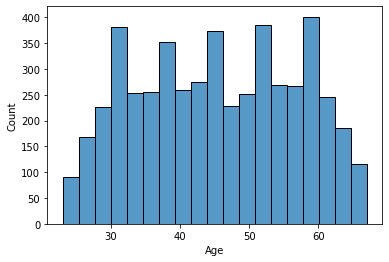

In [61]:
#Univariate Analysis
sns.histplot(dv.Age)

<AxesSubplot:xlabel='CustomerSince', ylabel='Count'>

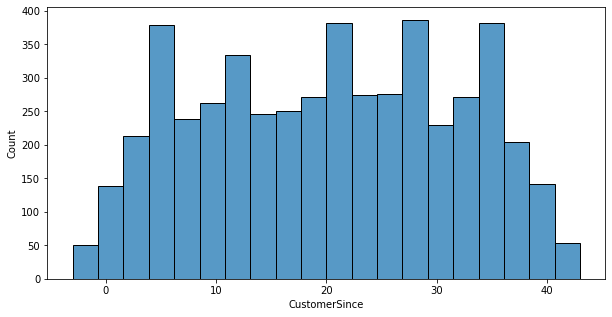

In [62]:
plt.figure(figsize=(10,5))
sns.histplot(dv.CustomerSince)

<Figure size 2160x1080 with 0 Axes>

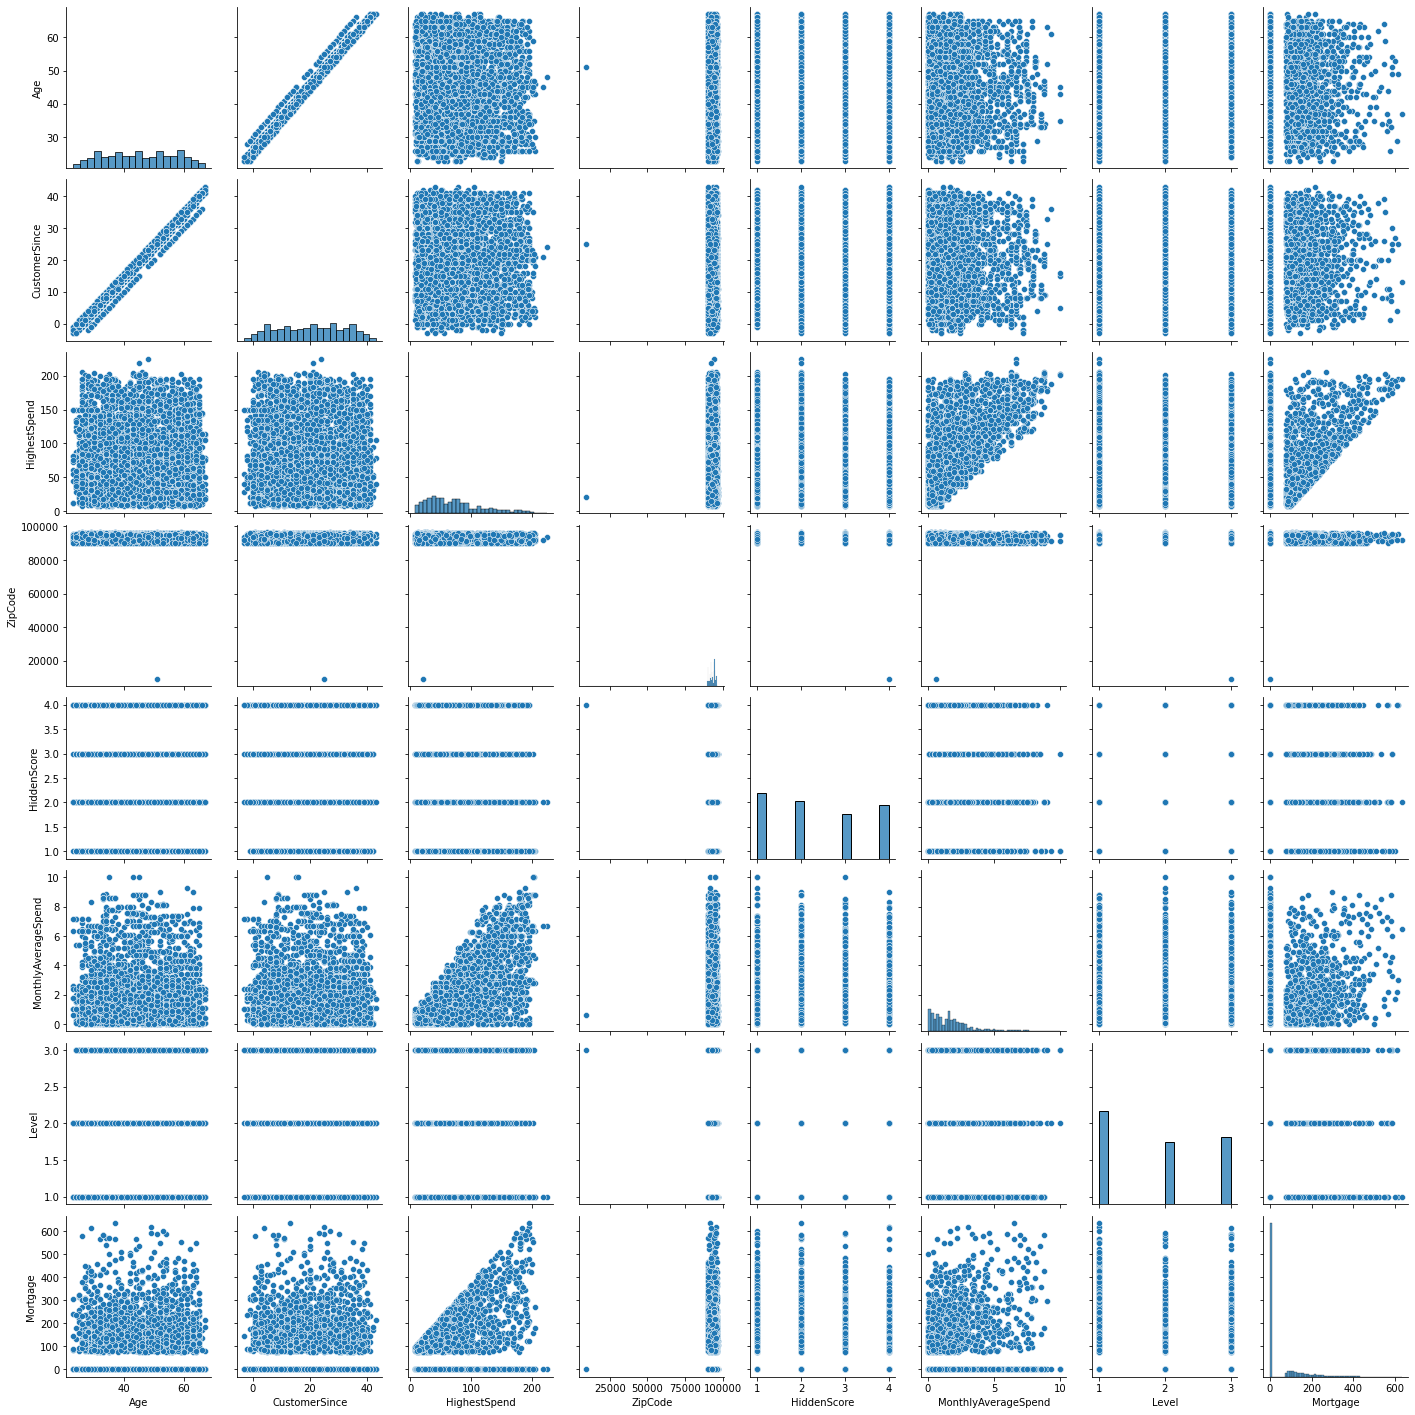

In [63]:
#Multivariate Analysis
plt.figure(figsize=(30,15))
sns.pairplot(dv)

In [64]:
#checking correlation between them
corr=dv.corr()

<AxesSubplot:>

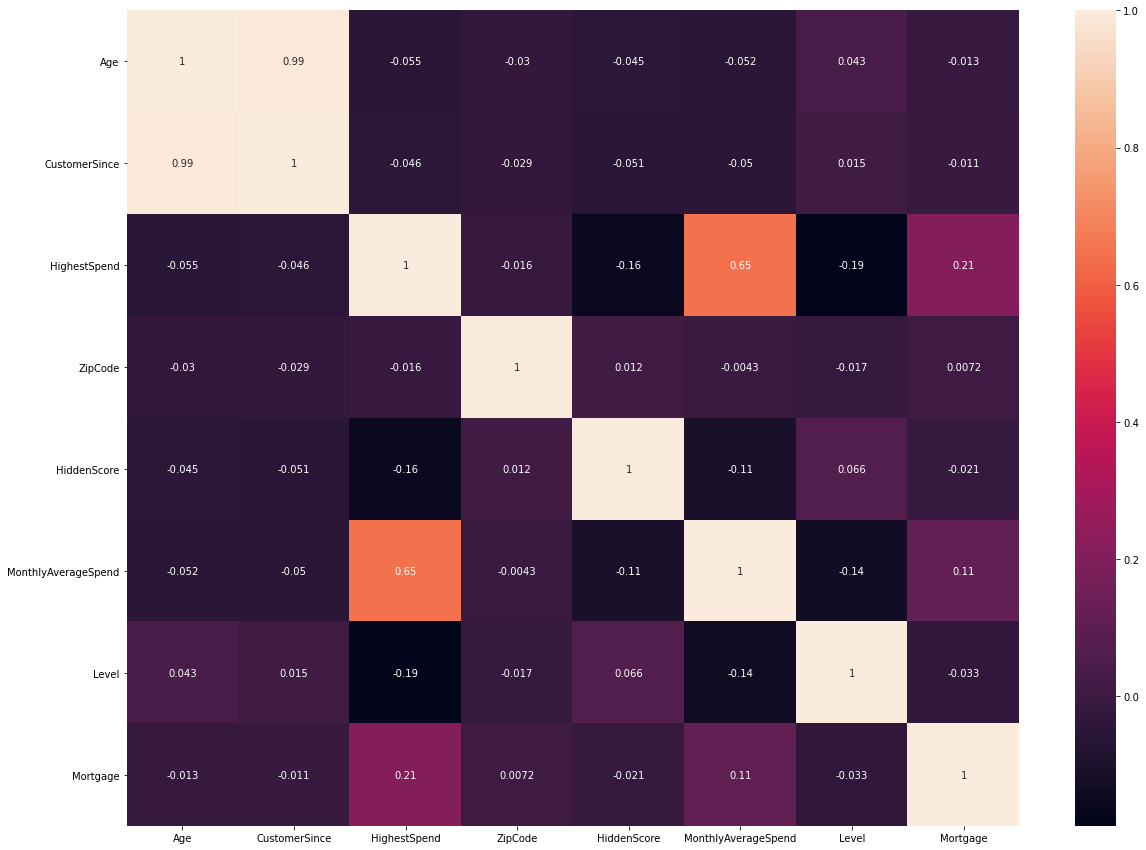

In [65]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [66]:
#here we can see Age and CustomerSince column are highly correlated.

# Data pre-processing:

In [67]:
# For preprocessing the data
#from sklearn.preprocessing import Imputer
from sklearn import preprocessing

In [68]:
X = dv.drop(['LoanOnCard'], axis=1)
Y = dv[['LoanOnCard']]

In [69]:
X

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
9,34,9,180,93023,1,8.9,3,0,0,0,0,0
10,65,39,105,94710,4,2.4,3,0,0,0,0,0
11,29,5,45,90277,3,0.1,2,0,0,0,1,0
12,48,23,114,93106,2,3.8,3,0,1,0,0,0
13,59,32,40,94920,4,2.5,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [70]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [71]:
X

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security_1,FixedDepositAccount_1,InternetBanking_1,CreditCard_1
9,34,9,180,93023,1,8.9,3,0,0,0,0,0
10,65,39,105,94710,4,2.4,3,0,0,0,0,0
11,29,5,45,90277,3,0.1,2,0,0,0,1,0
12,48,23,114,93106,2,3.8,3,0,1,0,0,0
13,59,32,40,94920,4,2.5,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [72]:
##Split into training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

# 5 . Model training, testing and tuning:

# Applying Logistic Regression


In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
#Build the logistic regression model
logreg = LogisticRegression(max_iter=5000)

In [75]:
logreg.fit(x_train, y_train.values.ravel())

LogisticRegression(max_iter=5000)

In [76]:
#Predict for test set
pred_test = logreg.predict(x_test)

In [77]:
#Predict for train set
pred_train = logreg.predict(x_train)

In [78]:
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(y_test, pred_test)

print('Test Accuracy: ',np.round(test_accuracy,3))

Test Accuracy:  0.903


In [79]:
train_accuracy=accuracy_score(y_train, pred_train)

print('Train Accuracy: ',np.round(train_accuracy,3))

Train Accuracy:  0.909


In [80]:
# And some other metrics 

print(classification_report(y_test, pred_test, digits=2))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1341
         1.0       0.55      0.30      0.39       153

    accuracy                           0.90      1494
   macro avg       0.74      0.64      0.67      1494
weighted avg       0.89      0.90      0.89      1494



<AxesSubplot:>

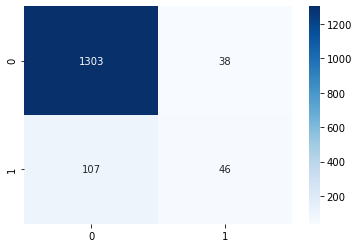

In [81]:
# Display confusion matrix
conf_mat = confusion_matrix(y_test, pred_test)
df_conf_mat = pd.DataFrame(conf_mat)
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

In [82]:
# import zscore for scaling the data
from scipy.stats import zscore

In [83]:
# Apply zscore on independent features
xtrainsc = x_train.apply(zscore)
xtestsc = x_test.apply(zscore)

In [84]:
# Fit the logistic regression model on scaled data 

model1 = LogisticRegression(random_state=0)
model1.fit(xtrainsc, y_train.values.ravel())

LogisticRegression(random_state=0)

In [85]:
model1.score(xtrainsc, y_train)

0.9520940906483075

In [86]:
model1.score(xtestsc, y_test)

0.9504685408299867

# Handling target imbalacing using SMOTE

In [87]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_sm, y_sm = smote.fit_resample(xtrainsc, y_train)


In [88]:
y_sm.value_counts()

LoanOnCard
0.0           3159
1.0           3159
dtype: int64

In [89]:
logreg=LogisticRegression()

In [90]:
logreg.fit(x_sm,y_sm.values.ravel())

LogisticRegression()

In [91]:
#Predict for test set
pred_test = logreg.predict(xtestsc)

In [92]:
test_accuracy=accuracy_score(y_test, pred_test)
test_accuracy

0.8995983935742972

# 6. Conclusion and improvisation

In [93]:
# As we can see here clearly that initaily our score was 90% but when we scaled our data with the help of ZScore So accuracy is increased 
#to 95% but problem was that Target data was imbalaced. So we balaced the target feature using SMOTE technique 
# thatswhy our accuracy is 90%
# this accuracy is best thatswhy now we can say that This model is very good.

# Applying  Naive Bayes 

In [94]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
model = GaussianNB()

model.fit(x_train, y_train.values.ravel())

GaussianNB()

# Performance of our model with training data

In [95]:
 train_predict = model.predict(x_train)

from sklearn import metrics

print((metrics.accuracy_score(y_train, train_predict)))

0.8924268502581756


# Performance of our model with testing data

In [96]:
test_predict = model.predict(x_test)

from sklearn import metrics

print((metrics.accuracy_score(y_test, test_predict)))

0.8848728246318608


# Lets check the confusion matrix and classification report

Confusion Matrix


<AxesSubplot:>

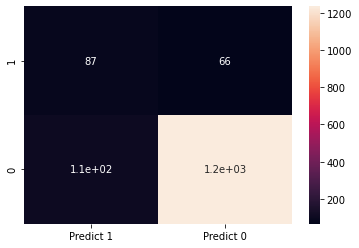

In [97]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm, annot=True)

In [98]:
print("Classification Report")
print(metrics.classification_report(y_test, test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.45      0.57      0.50       153
           0       0.95      0.92      0.93      1341

    accuracy                           0.88      1494
   macro avg       0.70      0.74      0.72      1494
weighted avg       0.90      0.88      0.89      1494



# Handling target imbalacing using SMOTE

In [99]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_resample, y_resample = smote.fit_resample(x_train, y_train)


In [100]:
y_resample.value_counts()

LoanOnCard
0.0           3159
1.0           3159
dtype: int64

In [101]:
db_model = GaussianNB()

db_model.fit(x_train, y_train.values.ravel())

GaussianNB()

In [102]:
y_pred=db_model.predict(x_test)

In [103]:
accuracy_score(y_test,y_pred)

0.8848728246318608

In [104]:
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.45      0.57      0.50       153
           0       0.95      0.92      0.93      1341

    accuracy                           0.88      1494
   macro avg       0.70      0.74      0.72      1494
weighted avg       0.90      0.88      0.89      1494



# 6. Conclusion and improvisation:

In [105]:
# Here we can see that initially our accuracy score was 88% but target feature was imbalaced Thatswhy I balanced the data 
# using SMOTE technique but we can see that after applying that also, our accuracy score was 88% .

In [106]:
# As we can see here also After applying Naive Bayes, Our train data score was 89% while test data score was 88% So it might be cause
# overfitting model while After applying Logistic Regression Our Train and test data score are same Approx 90% which more than 
# Naive bayes So here we can say data applying Logistic Regression is better than applying Naive Bayes. 
# So Logistic Regression model is best here.